# Entities Recognition

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/entities](https://github.com/huseinzol05/Malaya/tree/master/example/entities).
    
</div>

<div class="alert alert-warning">

This module only trained on standard language structure, so it is not save to use it for local language structure.
    
</div>

In [1]:
%%time
import malaya

CPU times: user 4.75 s, sys: 917 ms, total: 5.66 s
Wall time: 6.58 s


### Describe supported entities

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
malaya.entity.describe()

,Tag,Description
0,OTHER,other
1,law,"law, regulation, related law documents, documents, etc"
2,location,"location, place"
3,organization,"organization, company, government, facilities, etc"
4,person,"person, group of people, believes, unique arts (eg; food, drink), etc"
5,quantity,"numbers, quantity"
6,time,"date, day, time, etc"
7,event,"unique event happened, etc"


### Describe supported Ontonotes 5 entities

In [3]:
malaya.entity.describe_ontonotes5()

,Tag,Description
0,OTHER,other
1,ADDRESS,Address of physical location.
2,PERSON,"People, including fictional."
3,NORP,Nationalities or religious or political groups.
4,FAC,"Buildings, airports, highways, bridges, etc."
5,ORG,"Companies, agencies, institutions, etc."
6,GPE,"Countries, cities, states."
7,LOC,"Non-GPE locations, mountain ranges, bodies of water."
8,PRODUCT,"Objects, vehicles, foods, etc. (Not services.)"
9,EVENT,"Named hurricanes, battles, wars, sports events, etc."


### List available Transformer NER models

In [4]:
malaya.entity.available_transformer()

INFO:root:tested on 20% test set.


,Size (MB),Quantized Size (MB),macro precision,macro recall,macro f1-score
bert,425.4,111.00,0.99291,0.97864,0.98537
tiny-bert,57.7,15.40,0.98151,0.94754,0.96134
albert,48.6,12.80,0.98026,0.95332,0.96492
tiny-albert,22.4,5.98,0.96100,0.90363,0.92374
xlnet,446.6,118.00,0.99344,0.98154,0.98725
alxlnet,46.8,13.30,0.99215,0.97575,0.98337


Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/models-accuracy.html#Entities-Recognition

### List available Transformer NER Ontonotes 5 models

In [5]:
malaya.entity.available_transformer_ontonotes5()

INFO:root:tested on 20% test set.


,Size (MB),Quantized Size (MB),macro precision,macro recall,macro f1-score
bert,425.4,111.00,0.94460,0.93244,0.93822
tiny-bert,57.7,15.40,0.91908,0.91635,0.91704
albert,48.6,12.80,0.93010,0.92341,0.92636
tiny-albert,22.4,5.98,0.90298,0.88251,0.89145
xlnet,446.6,118.00,0.93814,0.95021,0.94388
alxlnet,46.8,13.30,0.93244,0.92942,0.93047


Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/models-accuracy.html#Entities-Recognition-Ontonotes5

In [6]:
string = 'KUALA LUMPUR: Sempena sambutan Aidilfitri minggu depan, Perdana Menteri Tun Dr Mahathir Mohamad dan Menteri Pengangkutan Anthony Loke Siew Fook menitipkan pesanan khas kepada orang ramai yang mahu pulang ke kampung halaman masing-masing. Dalam video pendek terbitan Jabatan Keselamatan Jalan Raya (JKJR) itu, Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar  sekiranya mengantuk ketika memandu.'
string1 = 'memperkenalkan Husein, dia sangat comel, berumur 25 tahun, bangsa melayu, agama islam, tinggal di cyberjaya malaysia, bercakap bahasa melayu, semua membaca buku undang-undang kewangan, dengar laju Justin Bieber - Baby sambil makan ayam goreng KFC'

### Load Transformer model

```python
def transformer(model: str = 'xlnet', quantized: bool = False, **kwargs):
    """
    Load Transformer Entity Tagging model, transfer learning Transformer + CRF.

    Parameters
    ----------
    model : str, optional (default='bert')
        Model architecture supported. Allowed values:

        * ``'bert'`` - Google BERT BASE parameters.
        * ``'tiny-bert'`` - Google BERT TINY parameters.
        * ``'albert'`` - Google ALBERT BASE parameters.
        * ``'tiny-albert'`` - Google ALBERT TINY parameters.
        * ``'xlnet'`` - Google XLNET BASE parameters.
        * ``'alxlnet'`` - Malaya ALXLNET BASE parameters.
        
    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model. 
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result : malaya.supervised.tag.transformer function
    """
```

In [7]:
model = malaya.entity.transformer(model = 'alxlnet')

#### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [8]:
quantized_model = malaya.entity.transformer(model = 'alxlnet', quantized = True)

#### Predict

```python
def predict(self, string: str):
    """
    Tag a string.

    Parameters
    ----------
    string : str

    Returns
    -------
    result: Tuple[str, str]
    """
```

In [9]:
model.predict(string)

[('KUALA', 'location'),
 ('LUMPUR:', 'location'),
 ('Sempena', 'OTHER'),
 ('sambutan', 'OTHER'),
 ('Aidilfitri', 'event'),
 ('minggu', 'time'),
 ('depan,', 'time'),
 ('Perdana', 'person'),
 ('Menteri', 'person'),
 ('Tun', 'person'),
 ('Dr', 'person'),
 ('Mahathir', 'person'),
 ('Mohamad', 'person'),
 ('dan', 'OTHER'),
 ('Menteri', 'organization'),
 ('Pengangkutan', 'organization'),
 ('Anthony', 'person'),
 ('Loke', 'person'),
 ('Siew', 'person'),
 ('Fook', 'person'),
 ('menitipkan', 'OTHER'),
 ('pesanan', 'OTHER'),
 ('khas', 'OTHER'),
 ('kepada', 'OTHER'),
 ('orang', 'OTHER'),
 ('ramai', 'OTHER'),
 ('yang', 'OTHER'),
 ('mahu', 'OTHER'),
 ('pulang', 'OTHER'),
 ('ke', 'OTHER'),
 ('kampung', 'OTHER'),
 ('halaman', 'OTHER'),
 ('masing-masing.', 'OTHER'),
 ('Dalam', 'OTHER'),
 ('video', 'OTHER'),
 ('pendek', 'OTHER'),
 ('terbitan', 'OTHER'),
 ('Jabatan', 'organization'),
 ('Keselamatan', 'organization'),
 ('Jalan', 'organization'),
 ('Raya', 'organization'),
 ('(JKJR)', 'organization'),
 ('

In [10]:
model.predict(string1)

[('memperkenalkan', 'OTHER'),
 ('Husein,', 'person'),
 ('dia', 'OTHER'),
 ('sangat', 'OTHER'),
 ('comel,', 'OTHER'),
 ('berumur', 'OTHER'),
 ('25', 'OTHER'),
 ('tahun,', 'OTHER'),
 ('bangsa', 'OTHER'),
 ('melayu,', 'person'),
 ('agama', 'OTHER'),
 ('islam,', 'person'),
 ('tinggal', 'OTHER'),
 ('di', 'OTHER'),
 ('cyberjaya', 'location'),
 ('malaysia,', 'location'),
 ('bercakap', 'OTHER'),
 ('bahasa', 'OTHER'),
 ('melayu,', 'person'),
 ('semua', 'OTHER'),
 ('membaca', 'OTHER'),
 ('buku', 'OTHER'),
 ('undang-undang', 'OTHER'),
 ('kewangan,', 'OTHER'),
 ('dengar', 'OTHER'),
 ('laju', 'OTHER'),
 ('Justin', 'person'),
 ('Bieber', 'person'),
 ('-', 'OTHER'),
 ('Baby', 'person'),
 ('sambil', 'OTHER'),
 ('makan', 'OTHER'),
 ('ayam', 'OTHER'),
 ('goreng', 'OTHER'),
 ('KFC', 'organization')]

In [11]:
quantized_model.predict(string)

[('KUALA', 'location'),
 ('LUMPUR:', 'location'),
 ('Sempena', 'OTHER'),
 ('sambutan', 'OTHER'),
 ('Aidilfitri', 'event'),
 ('minggu', 'time'),
 ('depan,', 'time'),
 ('Perdana', 'person'),
 ('Menteri', 'person'),
 ('Tun', 'person'),
 ('Dr', 'person'),
 ('Mahathir', 'person'),
 ('Mohamad', 'person'),
 ('dan', 'OTHER'),
 ('Menteri', 'person'),
 ('Pengangkutan', 'person'),
 ('Anthony', 'person'),
 ('Loke', 'person'),
 ('Siew', 'person'),
 ('Fook', 'person'),
 ('menitipkan', 'OTHER'),
 ('pesanan', 'OTHER'),
 ('khas', 'OTHER'),
 ('kepada', 'OTHER'),
 ('orang', 'OTHER'),
 ('ramai', 'OTHER'),
 ('yang', 'OTHER'),
 ('mahu', 'OTHER'),
 ('pulang', 'OTHER'),
 ('ke', 'OTHER'),
 ('kampung', 'OTHER'),
 ('halaman', 'OTHER'),
 ('masing-masing.', 'OTHER'),
 ('Dalam', 'OTHER'),
 ('video', 'OTHER'),
 ('pendek', 'OTHER'),
 ('terbitan', 'OTHER'),
 ('Jabatan', 'organization'),
 ('Keselamatan', 'organization'),
 ('Jalan', 'organization'),
 ('Raya', 'organization'),
 ('(JKJR)', 'organization'),
 ('itu,', 'OTHE

In [12]:
quantized_model.predict(string1)

[('memperkenalkan', 'OTHER'),
 ('Husein,', 'person'),
 ('dia', 'OTHER'),
 ('sangat', 'OTHER'),
 ('comel,', 'OTHER'),
 ('berumur', 'OTHER'),
 ('25', 'time'),
 ('tahun,', 'OTHER'),
 ('bangsa', 'OTHER'),
 ('melayu,', 'person'),
 ('agama', 'OTHER'),
 ('islam,', 'person'),
 ('tinggal', 'OTHER'),
 ('di', 'OTHER'),
 ('cyberjaya', 'location'),
 ('malaysia,', 'location'),
 ('bercakap', 'OTHER'),
 ('bahasa', 'OTHER'),
 ('melayu,', 'OTHER'),
 ('semua', 'OTHER'),
 ('membaca', 'OTHER'),
 ('buku', 'OTHER'),
 ('undang-undang', 'OTHER'),
 ('kewangan,', 'OTHER'),
 ('dengar', 'OTHER'),
 ('laju', 'OTHER'),
 ('Justin', 'organization'),
 ('Bieber', 'event'),
 ('-', 'event'),
 ('Baby', 'event'),
 ('sambil', 'OTHER'),
 ('makan', 'OTHER'),
 ('ayam', 'OTHER'),
 ('goreng', 'OTHER'),
 ('KFC', 'organization')]

#### Group similar tags

```python
def analyze(self, string: str):
        """
        Analyze a string.

        Parameters
        ----------
        string : str

        Returns
        -------
        result: {'words': List[str], 'tags': [{'text': 'text', 'type': 'location', 'score': 1.0, 'beginOffset': 0, 'endOffset': 1}]}
        """
```

In [13]:
model.analyze(string)

{'words': ['KUALA',
  'LUMPUR:',
  'Sempena',
  'sambutan',
  'Aidilfitri',
  'minggu',
  'depan,',
  'Perdana',
  'Menteri',
  'Tun',
  'Dr',
  'Mahathir',
  'Mohamad',
  'dan',
  'Menteri',
  'Pengangkutan',
  'Anthony',
  'Loke',
  'Siew',
  'Fook',
  'menitipkan',
  'pesanan',
  'khas',
  'kepada',
  'orang',
  'ramai',
  'yang',
  'mahu',
  'pulang',
  'ke',
  'kampung',
  'halaman',
  'masing-masing.',
  'Dalam',
  'video',
  'pendek',
  'terbitan',
  'Jabatan',
  'Keselamatan',
  'Jalan',
  'Raya',
  '(JKJR)',
  'itu,',
  'Dr',
  'Mahathir',
  'menasihati',
  'mereka',
  'supaya',
  'berhenti',
  'berehat',
  'dan',
  'tidur',
  'sebentar',
  'sekiranya',
  'mengantuk',
  'ketika',
  'memandu.'],
 'tags': [{'text': 'KUALA LUMPUR:',
   'type': 'location',
   'score': 1.0,
   'beginOffset': 0,
   'endOffset': 1},
  {'text': 'Sempena sambutan',
   'type': 'OTHER',
   'score': 1.0,
   'beginOffset': 2,
   'endOffset': 3},
  {'text': 'Aidilfitri',
   'type': 'event',
   'score': 1.0,

In [14]:
model.analyze(string1)

{'words': ['memperkenalkan',
  'Husein,',
  'dia',
  'sangat',
  'comel,',
  'berumur',
  '25',
  'tahun,',
  'bangsa',
  'melayu,',
  'agama',
  'islam,',
  'tinggal',
  'di',
  'cyberjaya',
  'malaysia,',
  'bercakap',
  'bahasa',
  'melayu,',
  'semua',
  'membaca',
  'buku',
  'undang-undang',
  'kewangan,',
  'dengar',
  'laju',
  'Justin',
  'Bieber',
  '-',
  'Baby',
  'sambil',
  'makan',
  'ayam',
  'goreng',
  'KFC'],
 'tags': [{'text': 'memperkenalkan',
   'type': 'OTHER',
   'score': 1.0,
   'beginOffset': 0,
   'endOffset': 0},
  {'text': 'Husein,',
   'type': 'person',
   'score': 1.0,
   'beginOffset': 1,
   'endOffset': 1},
  {'text': 'dia sangat comel, berumur',
   'type': 'OTHER',
   'score': 1.0,
   'beginOffset': 2,
   'endOffset': 5},
  {'text': '25',
   'type': 'time',
   'score': 1.0,
   'beginOffset': 6,
   'endOffset': 6},
  {'text': 'tahun, bangsa',
   'type': 'OTHER',
   'score': 1.0,
   'beginOffset': 7,
   'endOffset': 8},
  {'text': 'melayu,',
   'type': '

#### Vectorize

Let say you want to visualize word level in lower dimension, you can use `model.vectorize`,

```python
def vectorize(self, string: str):
    """
    vectorize a string.

    Parameters
    ----------
    string: List[str]

    Returns
    -------
    result: np.array
    """
```

In [15]:
strings = [string, 
          'Husein baca buku Perlembagaan yang berharga 3k ringgit dekat kfc sungai petani minggu lepas, 2 ptg 2 oktober 2019 , suhu 32 celcius, sambil makan ayam goreng dan milo o ais',
          'contact Husein at husein.zol05@gmail.com',
          'tolong tempahkan meja makan makan nasi dagang dan jus apple, milo tarik esok dekat Restoran Sebulek']

In [16]:
r = [quantized_model.vectorize(string) for string in strings]

In [17]:
x, y = [], []
for row in r:
    x.extend([i[0] for i in row])
    y.extend([i[1] for i in row])

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE().fit_transform(y)
tsne.shape

(108, 2)

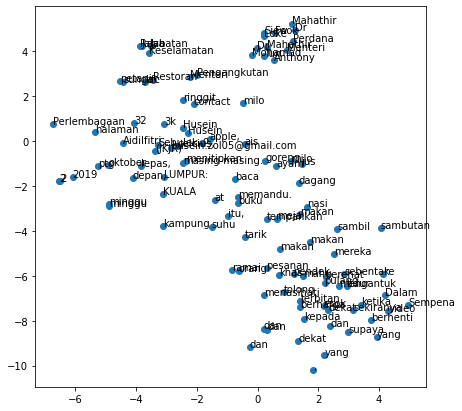

In [19]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = x
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )

Pretty good, the model able to know cluster similar entities.

### Load Transformer Ontonotes 5 model

```python
def transformer_ontonotes5(
    model: str = 'xlnet', quantized: bool = False, **kwargs
):
    """
    Load Transformer Entity Tagging model trained on Ontonotes 5 Bahasa, transfer learning Transformer + CRF.

    Parameters
    ----------
    model : str, optional (default='bert')
        Model architecture supported. Allowed values:

        * ``'bert'`` - Google BERT BASE parameters.
        * ``'tiny-bert'`` - Google BERT TINY parameters.
        * ``'albert'`` - Google ALBERT BASE parameters.
        * ``'tiny-albert'`` - Google ALBERT TINY parameters.
        * ``'xlnet'`` - Google XLNET BASE parameters.
        * ``'alxlnet'`` - Malaya ALXLNET BASE parameters.
        
    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model. 
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result : malaya.supervised.tag.transformer function
    """
```

In [37]:
model = malaya.entity.transformer_ontonotes5(model = 'albert')

INFO:tensorflow:loading sentence piece model


INFO:tensorflow:loading sentence piece model


#### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [38]:
quantized_model = malaya.entity.transformer_ontonotes5(model = 'albert', quantized = True)

INFO:tensorflow:loading sentence piece model


INFO:tensorflow:loading sentence piece model


#### Predict

```python
def predict(self, string: str):
    """
    Tag a string.

    Parameters
    ----------
    string : str

    Returns
    -------
    result: Tuple[str, str]
    """
```

In [39]:
model.predict(string)

[('KUALA', 'OTHER'),
 ('LUMPUR:', 'OTHER'),
 ('Sempena', 'OTHER'),
 ('sambutan', 'OTHER'),
 ('Aidilfitri', 'DATE'),
 ('minggu', 'DATE'),
 ('depan,', 'OTHER'),
 ('Perdana', 'OTHER'),
 ('Menteri', 'OTHER'),
 ('Tun', 'PERSON'),
 ('Dr', 'PERSON'),
 ('Mahathir', 'PERSON'),
 ('Mohamad', 'PERSON'),
 ('dan', 'OTHER'),
 ('Menteri', 'OTHER'),
 ('Pengangkutan', 'OTHER'),
 ('Anthony', 'PERSON'),
 ('Loke', 'PERSON'),
 ('Siew', 'PERSON'),
 ('Fook', 'PERSON'),
 ('menitipkan', 'OTHER'),
 ('pesanan', 'OTHER'),
 ('khas', 'OTHER'),
 ('kepada', 'OTHER'),
 ('orang', 'OTHER'),
 ('ramai', 'OTHER'),
 ('yang', 'OTHER'),
 ('mahu', 'OTHER'),
 ('pulang', 'OTHER'),
 ('ke', 'OTHER'),
 ('kampung', 'OTHER'),
 ('halaman', 'OTHER'),
 ('masing-masing.', 'OTHER'),
 ('Dalam', 'OTHER'),
 ('video', 'OTHER'),
 ('pendek', 'OTHER'),
 ('terbitan', 'OTHER'),
 ('Jabatan', 'ORG'),
 ('Keselamatan', 'ORG'),
 ('Jalan', 'ORG'),
 ('Raya', 'ORG'),
 ('(JKJR)', 'ORG'),
 ('itu,', 'OTHER'),
 ('Dr', 'PERSON'),
 ('Mahathir', 'PERSON'),
 ('men

In [40]:
model.predict(string1)

[('memperkenalkan', 'OTHER'),
 ('Husein,', 'NORP'),
 ('dia', 'OTHER'),
 ('sangat', 'OTHER'),
 ('comel,', 'OTHER'),
 ('berumur', 'DATE'),
 ('25', 'DATE'),
 ('tahun,', 'DATE'),
 ('bangsa', 'NORP'),
 ('melayu,', 'NORP'),
 ('agama', 'NORP'),
 ('islam,', 'NORP'),
 ('tinggal', 'OTHER'),
 ('di', 'OTHER'),
 ('cyberjaya', 'GPE'),
 ('malaysia,', 'GPE'),
 ('bercakap', 'OTHER'),
 ('bahasa', 'OTHER'),
 ('melayu,', 'OTHER'),
 ('semua', 'OTHER'),
 ('membaca', 'OTHER'),
 ('buku', 'OTHER'),
 ('undang-undang', 'OTHER'),
 ('kewangan,', 'OTHER'),
 ('dengar', 'OTHER'),
 ('laju', 'OTHER'),
 ('Justin', 'WORK_OF_ART'),
 ('Bieber', 'WORK_OF_ART'),
 ('-', 'X'),
 ('Baby', 'OTHER'),
 ('sambil', 'OTHER'),
 ('makan', 'OTHER'),
 ('ayam', 'OTHER'),
 ('goreng', 'OTHER'),
 ('KFC', 'ORG')]

In [41]:
quantized_model.predict(string)

[('KUALA', 'OTHER'),
 ('LUMPUR:', 'OTHER'),
 ('Sempena', 'OTHER'),
 ('sambutan', 'OTHER'),
 ('Aidilfitri', 'DATE'),
 ('minggu', 'DATE'),
 ('depan,', 'OTHER'),
 ('Perdana', 'OTHER'),
 ('Menteri', 'OTHER'),
 ('Tun', 'PERSON'),
 ('Dr', 'PERSON'),
 ('Mahathir', 'PERSON'),
 ('Mohamad', 'PERSON'),
 ('dan', 'OTHER'),
 ('Menteri', 'OTHER'),
 ('Pengangkutan', 'OTHER'),
 ('Anthony', 'PERSON'),
 ('Loke', 'PERSON'),
 ('Siew', 'PERSON'),
 ('Fook', 'PERSON'),
 ('menitipkan', 'OTHER'),
 ('pesanan', 'OTHER'),
 ('khas', 'OTHER'),
 ('kepada', 'OTHER'),
 ('orang', 'OTHER'),
 ('ramai', 'OTHER'),
 ('yang', 'OTHER'),
 ('mahu', 'OTHER'),
 ('pulang', 'OTHER'),
 ('ke', 'OTHER'),
 ('kampung', 'OTHER'),
 ('halaman', 'OTHER'),
 ('masing-masing.', 'OTHER'),
 ('Dalam', 'OTHER'),
 ('video', 'OTHER'),
 ('pendek', 'OTHER'),
 ('terbitan', 'OTHER'),
 ('Jabatan', 'ORG'),
 ('Keselamatan', 'ORG'),
 ('Jalan', 'ORG'),
 ('Raya', 'ORG'),
 ('(JKJR)', 'ORG'),
 ('itu,', 'OTHER'),
 ('Dr', 'PERSON'),
 ('Mahathir', 'PERSON'),
 ('men

In [42]:
quantized_model.predict(string1)

[('memperkenalkan', 'OTHER'),
 ('Husein,', 'NORP'),
 ('dia', 'OTHER'),
 ('sangat', 'OTHER'),
 ('comel,', 'OTHER'),
 ('berumur', 'DATE'),
 ('25', 'DATE'),
 ('tahun,', 'DATE'),
 ('bangsa', 'NORP'),
 ('melayu,', 'NORP'),
 ('agama', 'NORP'),
 ('islam,', 'NORP'),
 ('tinggal', 'OTHER'),
 ('di', 'OTHER'),
 ('cyberjaya', 'GPE'),
 ('malaysia,', 'GPE'),
 ('bercakap', 'OTHER'),
 ('bahasa', 'OTHER'),
 ('melayu,', 'OTHER'),
 ('semua', 'OTHER'),
 ('membaca', 'OTHER'),
 ('buku', 'OTHER'),
 ('undang-undang', 'OTHER'),
 ('kewangan,', 'OTHER'),
 ('dengar', 'OTHER'),
 ('laju', 'OTHER'),
 ('Justin', 'WORK_OF_ART'),
 ('Bieber', 'WORK_OF_ART'),
 ('-', 'X'),
 ('Baby', 'OTHER'),
 ('sambil', 'OTHER'),
 ('makan', 'OTHER'),
 ('ayam', 'OTHER'),
 ('goreng', 'OTHER'),
 ('KFC', 'ORG')]

#### Group similar tags

```python
def analyze(self, string: str):
        """
        Analyze a string.

        Parameters
        ----------
        string : str

        Returns
        -------
        result: {'words': List[str], 'tags': [{'text': 'text', 'type': 'location', 'score': 1.0, 'beginOffset': 0, 'endOffset': 1}]}
        """
```

In [43]:
model.analyze(string)

{'words': ['KUALA',
  'LUMPUR:',
  'Sempena',
  'sambutan',
  'Aidilfitri',
  'minggu',
  'depan,',
  'Perdana',
  'Menteri',
  'Tun',
  'Dr',
  'Mahathir',
  'Mohamad',
  'dan',
  'Menteri',
  'Pengangkutan',
  'Anthony',
  'Loke',
  'Siew',
  'Fook',
  'menitipkan',
  'pesanan',
  'khas',
  'kepada',
  'orang',
  'ramai',
  'yang',
  'mahu',
  'pulang',
  'ke',
  'kampung',
  'halaman',
  'masing-masing.',
  'Dalam',
  'video',
  'pendek',
  'terbitan',
  'Jabatan',
  'Keselamatan',
  'Jalan',
  'Raya',
  '(JKJR)',
  'itu,',
  'Dr',
  'Mahathir',
  'menasihati',
  'mereka',
  'supaya',
  'berhenti',
  'berehat',
  'dan',
  'tidur',
  'sebentar',
  'sekiranya',
  'mengantuk',
  'ketika',
  'memandu.'],
 'tags': [{'text': 'KUALA LUMPUR: Sempena sambutan',
   'type': 'OTHER',
   'score': 1.0,
   'beginOffset': 0,
   'endOffset': 3},
  {'text': 'Aidilfitri minggu',
   'type': 'DATE',
   'score': 1.0,
   'beginOffset': 4,
   'endOffset': 5},
  {'text': 'depan, Perdana Menteri',
   'type':

In [44]:
model.analyze(string1)

{'words': ['memperkenalkan',
  'Husein,',
  'dia',
  'sangat',
  'comel,',
  'berumur',
  '25',
  'tahun,',
  'bangsa',
  'melayu,',
  'agama',
  'islam,',
  'tinggal',
  'di',
  'cyberjaya',
  'malaysia,',
  'bercakap',
  'bahasa',
  'melayu,',
  'semua',
  'membaca',
  'buku',
  'undang-undang',
  'kewangan,',
  'dengar',
  'laju',
  'Justin',
  'Bieber',
  '-',
  'Baby',
  'sambil',
  'makan',
  'ayam',
  'goreng',
  'KFC'],
 'tags': [{'text': 'memperkenalkan',
   'type': 'OTHER',
   'score': 1.0,
   'beginOffset': 0,
   'endOffset': 0},
  {'text': 'Husein,',
   'type': 'NORP',
   'score': 1.0,
   'beginOffset': 1,
   'endOffset': 1},
  {'text': 'dia sangat comel,',
   'type': 'OTHER',
   'score': 1.0,
   'beginOffset': 2,
   'endOffset': 4},
  {'text': 'berumur 25 tahun,',
   'type': 'DATE',
   'score': 1.0,
   'beginOffset': 5,
   'endOffset': 7},
  {'text': 'bangsa melayu, agama islam,',
   'type': 'NORP',
   'score': 1.0,
   'beginOffset': 8,
   'endOffset': 11},
  {'text': 'tin

#### Vectorize

Let say you want to visualize word level in lower dimension, you can use `model.vectorize`,

```python
def vectorize(self, string: str):
    """
    vectorize a string.

    Parameters
    ----------
    string: List[str]

    Returns
    -------
    result: np.array
    """
```

In [45]:
strings = [string, string1]
r = [quantized_model.vectorize(string) for string in strings]

In [46]:
x, y = [], []
for row in r:
    x.extend([i[0] for i in row])
    y.extend([i[1] for i in row])

In [47]:
tsne = TSNE().fit_transform(y)
tsne.shape

(92, 2)

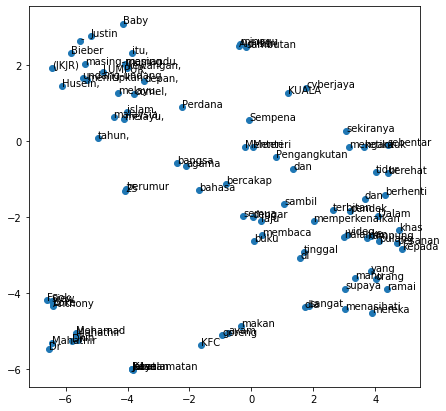

In [48]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = x
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )

Pretty good, the model able to know cluster similar entities.

### Load general Malaya entity model

This model able to classify,

1. date
2. money
3. temperature
4. distance
5. volume
6. duration
7. phone
8. email
9. url
10. time
11. datetime
12. local and generic foods, can check available rules in malaya.texts._food
13. local and generic drinks, can check available rules in malaya.texts._food

We can insert BERT or any deep learning model by passing `malaya.entity.general_entity(model = model)`, as long the model has `predict` method and return `[(string, label), (string, label)]`. This is an optional.

In [32]:
entity = malaya.entity.general_entity(model = model)

In [33]:
entity.predict('Husein baca buku Perlembagaan yang berharga 3k ringgit dekat kfc sungai petani minggu lepas, 2 ptg 2 oktober 2019 , suhu 32 celcius, sambil makan ayam goreng dan milo o ais')

{'PERSON': ['Husein'],
 'OTHER': ['baca buku Perlembagaan yang berharga',
  'ringgit dekat kfc sungai petani',
  ', suhu 32 celcius, sambil makan ayam goreng dan milo o ais'],
 'CARDINAL': ['3k'],
 'DATE': ['minggu lepas,', '2019'],
 'TIME': ['2 ptg'],
 'MONEY': ['2 oktober'],
 'date': {'2 oktober 2019': datetime.datetime(2019, 10, 2, 0, 0),
  'minggu lalu': datetime.datetime(2021, 2, 11, 13, 27, 58, 82807)},
 'money': {'3k ringgit': 'RM3000.0'},
 'temperature': ['32 celcius'],
 'distance': [],
 'volume': [],
 'duration': [],
 'phone': [],
 'email': [],
 'url': [],
 'time': {'2 PM': datetime.datetime(2021, 2, 18, 14, 0)},
 'datetime': {'2 ptg 2 oktober 2019': datetime.datetime(2019, 10, 2, 14, 0)},
 'food': ['ayam goreng'],
 'drink': ['milo o ais'],
 'weight': []}

In [34]:
entity.predict('contact Husein at husein.zol05@gmail.com')

{'OTHER': ['contact Husein at husein.zol05@gmail.com'],
 'date': {},
 'money': {},
 'temperature': [],
 'distance': [],
 'volume': [],
 'duration': [],
 'phone': [],
 'email': ['husein.zol05@gmail.com'],
 'url': [],
 'time': {},
 'datetime': {},
 'food': [],
 'drink': [],
 'weight': []}

In [35]:
entity.predict('tolong tempahkan meja makan makan nasi dagang dan jus apple, milo tarik esok dekat Restoran Sebulek')

{'OTHER': ['tolong tempahkan meja makan makan nasi dagang dan jus apple, milo tarik',
  'dekat'],
 'DATE': ['esok'],
 'ORG': ['Restoran Sebulek'],
 'date': {'esok': datetime.datetime(2021, 2, 19, 13, 27, 58, 505853)},
 'money': {},
 'temperature': [],
 'distance': [],
 'volume': [],
 'duration': [],
 'phone': [],
 'email': [],
 'url': [],
 'time': {},
 'datetime': {},
 'food': ['nasi dagang'],
 'drink': ['milo tarik', 'jus apple'],
 'weight': []}

### Voting stack model

In [36]:
alxlnet = malaya.entity.transformer_ontonotes5(model = 'alxlnet')
malaya.stack.voting_stack([model, alxlnet, alxlnet], string1)

INFO:tensorflow:loading sentence piece model


INFO:tensorflow:loading sentence piece model


[('memperkenalkan', 'OTHER'),
 ('Husein,', 'PERSON'),
 ('dia', 'OTHER'),
 ('sangat', 'OTHER'),
 ('comel,', 'OTHER'),
 ('berumur', 'OTHER'),
 ('25', 'DATE'),
 ('tahun,', 'DATE'),
 ('bangsa', 'OTHER'),
 ('melayu,', 'OTHER'),
 ('agama', 'OTHER'),
 ('islam,', 'OTHER'),
 ('tinggal', 'OTHER'),
 ('di', 'OTHER'),
 ('cyberjaya', 'ADDRESS'),
 ('malaysia,', 'OTHER'),
 ('bercakap', 'OTHER'),
 ('bahasa', 'OTHER'),
 ('melayu,', 'OTHER'),
 ('semua', 'OTHER'),
 ('membaca', 'OTHER'),
 ('buku', 'OTHER'),
 ('undang-undang', 'OTHER'),
 ('kewangan,', 'OTHER'),
 ('dengar', 'OTHER'),
 ('laju', 'OTHER'),
 ('Justin', 'ORG'),
 ('Bieber', 'PERSON'),
 ('-', 'OTHER'),
 ('Baby', 'OTHER'),
 ('sambil', 'OTHER'),
 ('makan', 'OTHER'),
 ('ayam', 'OTHER'),
 ('goreng', 'OTHER'),
 ('KFC', 'OTHER')]